## Import Libraries and Data

In [4]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_17-27-07-2023.csv', firstRow=660, lastRow=666)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_180723_S661-666.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [5]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=470s; mass=43.79945g
This equals a volume of 43.887m; expected was 44.009mL; error is 0.277%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.002 g/s and for 2nd derivative = 0.0005625000000000001 g/s^2


<IPython.core.display.Javascript object>


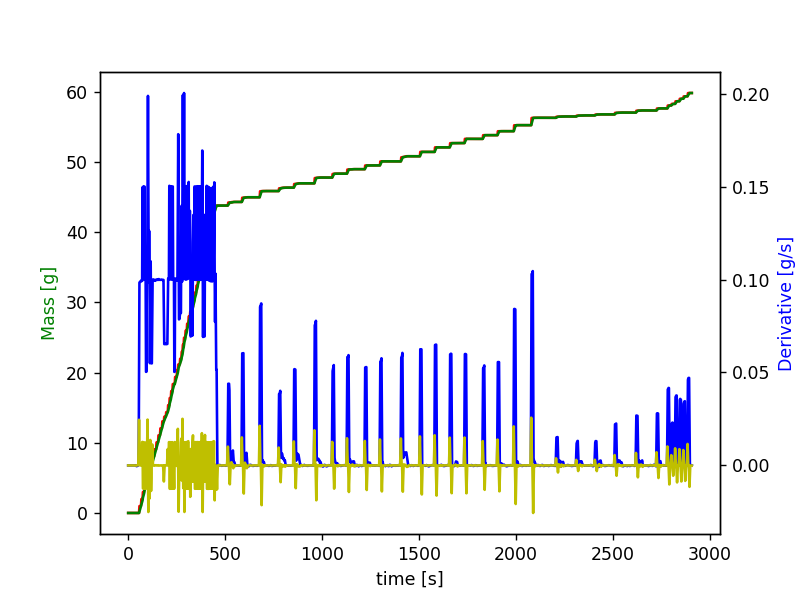

Addition of 0.524g Texapon SB 3 KC detected from 508s to 548s - expected volume = 0.564mL and actual volume = 0.471mL (resulting error is 16.411%)
Addition of 0.669g Texapon SB 3 KC detected from 582s to 618s - expected volume = 0.564mL and actual volume = 0.602mL (resulting error is 6.746%)
Addition of 0.885g Plantapon ACG 50 detected from 674s to 698s - expected volume = 0.859mL and actual volume = 0.787mL (resulting error is 8.342%)
Addition of 0.491g Plantacare 818 detected from 772s to 814s - expected volume = 0.567mL and actual volume = 0.449mL (resulting error is 20.711%)
Addition of 0.613g Plantacare 818 detected from 850s to 888s - expected volume = 0.567mL and actual volume = 0.561mL (resulting error is 1.018%)
Addition of 0.824g Plantacare 2000 detected from 956s to 990s - expected volume = 0.914mL and actual volume = 0.756mL (resulting error is 17.319%)
Addition of 0.55g Dehyton MC detected from 1048s to 1070s - expected volume = 0.553mL and actual volume = 0.512mL (resulti

In [6]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00225 g/s and for 2nd derivative = 0.0005625000000000001 g/s^2


<IPython.core.display.Javascript object>


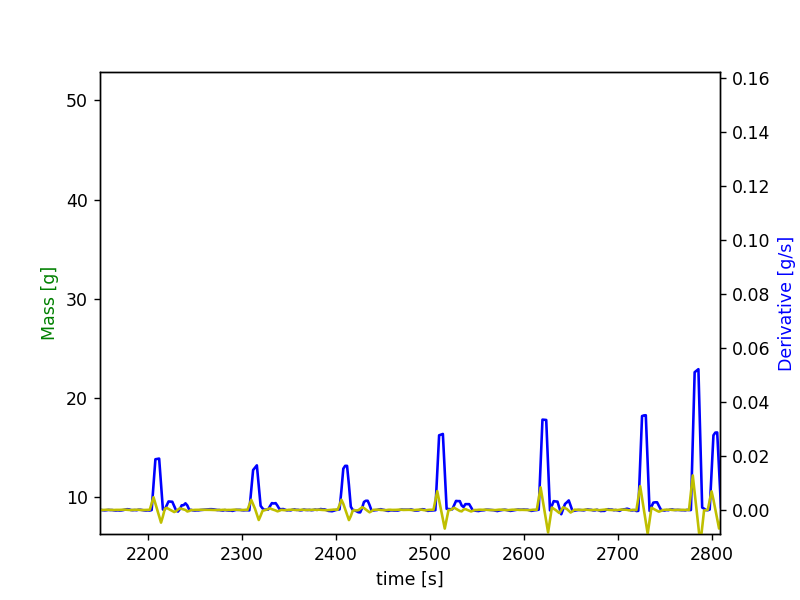

Addition of 0.189g Salcare Super 7 detected from 2202s to 2246s - expected volume = 0.217mL and actual volume = 0.171mL (resulting error is 21.525%)
Addition of 0.151g Salcare Super 7 detected from 2306s to 2340s - expected volume = 0.117mL and actual volume = 0.136mL (resulting error is 16.442%)
Addition of 0.15g Salcare Super 7 detected from 2402s to 2440s - expected volume = 0.107mL and actual volume = 0.135mL (resulting error is 26.05%)
Addition of 0.266g Salcare Super 7 detected from 2504s to 2548s - expected volume = 0.25mL and actual volume = 0.241mL (resulting error is 3.487%)
Addition of 0.306g Salcare Super 7 detected from 2614s to 2654s - expected volume = 0.263mL and actual volume = 0.278mL (resulting error is 5.753%)
Addition of 0.298g Salcare Super 7 detected from 2720s to 2748s - expected volume = 0.268mL and actual volume = 0.267mL (resulting error is 0.334%)


In [10]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=4, mergeSens=6, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


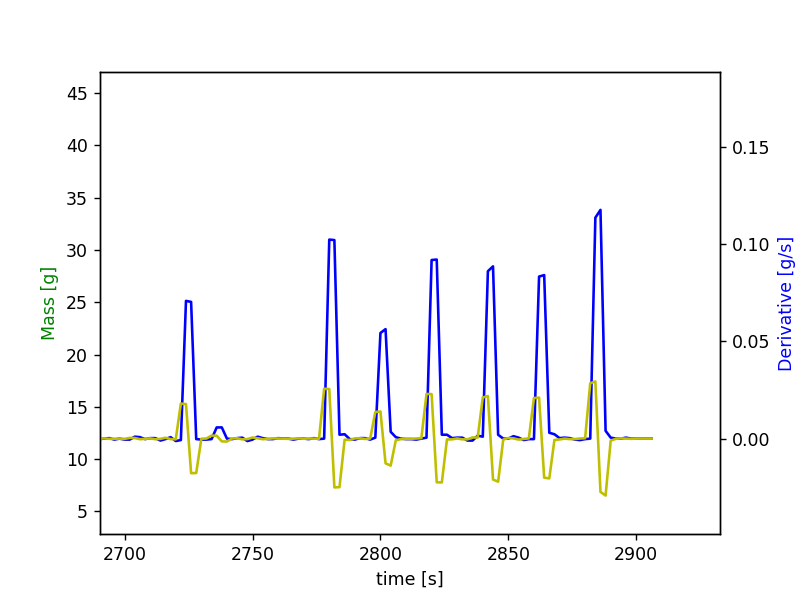

Addition of 0.416g Arlypon F detected from 2776s to 2788s - expected volume = 0.468mL and actual volume = 0.475mL (resulting error is 1.338%)
Addition of 0.23g Arlypon F detected from 2796s to 2808s - expected volume = 0.236mL and actual volume = 0.262mL (resulting error is 11.111%)
Addition of 0.376g Arlypon F detected from 2816s to 2828s - expected volume = 0.409mL and actual volume = 0.429mL (resulting error is 5.028%)
Addition of 0.356g Arlypon F detected from 2838s to 2850s - expected volume = 0.383mL and actual volume = 0.407mL (resulting error is 6.269%)
Addition of 0.343g Arlypon F detected from 2858s to 2870s - expected volume = 0.372mL and actual volume = 0.395mL (resulting error is 6.192%)
Addition of 0.469g Arlypon F detected from 2880s to 2892s - expected volume = 0.513mL and actual volume = 0.531mL (resulting error is 3.532%)


In [11]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2600,2616,2636,2656,2676,2884,2906])

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_180723_S655-S660.csv', index=False)
actualMassFractions